In [1]:
using Plots
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [2]:
path_img = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_meta = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"


"/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"

In [3]:
meta = Load.slc_meta(path_meta);
precise_orbit = Load.precise_orbit(path_pod,meta["t_0"]);

In [4]:
lat_lon = hcat(
    [(56 + 33/60 + 42.5556/(60*60)),(8 + 18/60 + 26.874/(60*60))],
    [(56 + 33/60 + 44.4528/(60*60)) ,(8 + 18/60 + 24.865/(60*60))],
    [(56 + 33/60 + 42.8652/(60*60)) ,(8 + 18/60 + 22.104/(60*60))])'


3×2 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 56.5618  8.30747
 56.5623  8.30691
 56.5619  8.30614

In [5]:
heights = [42.753,43.282,44.475]

3-element Array{Float64,1}:
 42.753
 43.282
 44.475

In [6]:
reflector_index = to_line_sample(lat_lon, heights, precise_orbit...,meta)

3×2 Array{Float64,2}:
 1126.43  6086.27
 1122.66  6098.7 
 1126.71  6109.43

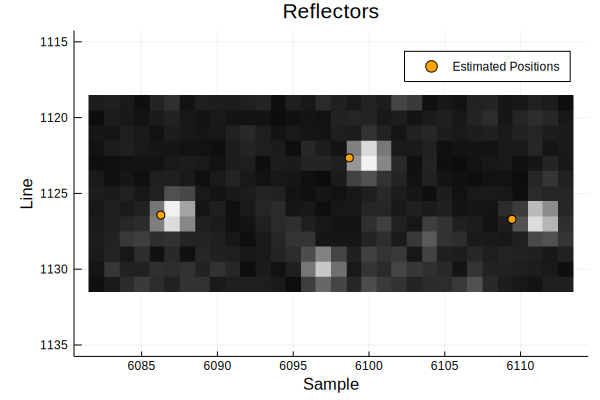

In [7]:
padding=4
line_min = round.(Int,minimum(reflector_index[:,1]))
line_max = round.(Int,maximum(reflector_index[:,1]))
sample_min = round.(Int,minimum(reflector_index[:,2]))
sample_max = round.(Int,maximum(reflector_index[:,2]))

plot_index = [(reflector_index[i,2],reflector_index[i,1]) for i in 1:3]

view =[(line_min-padding):(line_max+padding), (sample_min-padding):(sample_max+padding)]
heatmap(collect(view[2]) , collect(view[1]), abs.(Load.slc_data(path_img,view)), aspect_ratio=1, color=:grays,legend=false)
scatter!(plot_index, markersize=4, c=:orange , legend=true,label="Estimated Positions")
title!("Reflectors")
yaxis!("Line",:flip)
xaxis!("Sample")

In [8]:
savefig("to_line_sample.png")

## Try to add a bit of atmospheric delay

In [9]:
c_delay= 299791728
100-(299792458-c_delay)/299792458*100

99.9997564982105

In [10]:
reflector_index = to_line_sample(lat_lon, heights, precise_orbit...,meta ,c=c_delay)

3×2 Array{Float64,2}:
 1126.43  6087.23
 1122.66  6099.66
 1126.71  6110.39

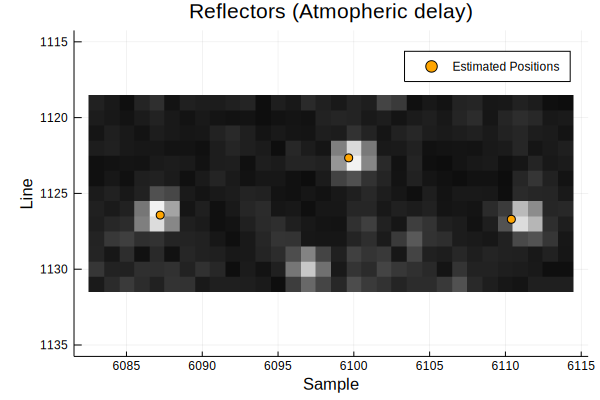

In [11]:
padding=4
line_min = round.(Int,minimum(reflector_index[:,1]))
line_max = round.(Int,maximum(reflector_index[:,1]))
sample_min = round.(Int,minimum(reflector_index[:,2]))
sample_max = round.(Int,maximum(reflector_index[:,2]))

plot_index = [(reflector_index[i,2],reflector_index[i,1]) for i in 1:3]

view =[(line_min-padding):(line_max+padding), (sample_min-padding):(sample_max+padding)]
heatmap(collect(view[2]) , collect(view[1]), abs.(Load.slc_data(path_img,view)), aspect_ratio=1, color=:grays,legend=false)
scatter!(plot_index, markersize=4, c=:orange , legend=true,label="Estimated Positions")
title!("Reflectors (Atmopheric delay)")
yaxis!("Line",:flip)
xaxis!("Sample")

In [12]:
savefig("to_line_sample_delay.png")

### Pixel spacing

In [13]:
meta["azimuth_pixel_spacing"]

13.84746

In [14]:
meta["range_pixel_spacing"]*cos(30/180*pi)

2.017459871690885